In [ ]:
# source bin/activate the venv first, then pip3 install ipykernel (the jupyternotebook kernel is created
# based on the current active env, hence sourcing first). name=whatever, the important thing is that it WILL 
# auto update the notebook + packages. (pip3 install seaborn in sourced cmdline makes seaborn appear in the 
# pip freeze in the notebook)

In [199]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [239]:
points, ignore_classes = make_gaussian_quantiles(n_samples=1000000, n_features = 2, cov=1, n_classes=1, random_state=42)

In [324]:
rand100 = np.random.choice(range(1000000), 100)
sample_100 = np.array([points[i] for i in rand100])

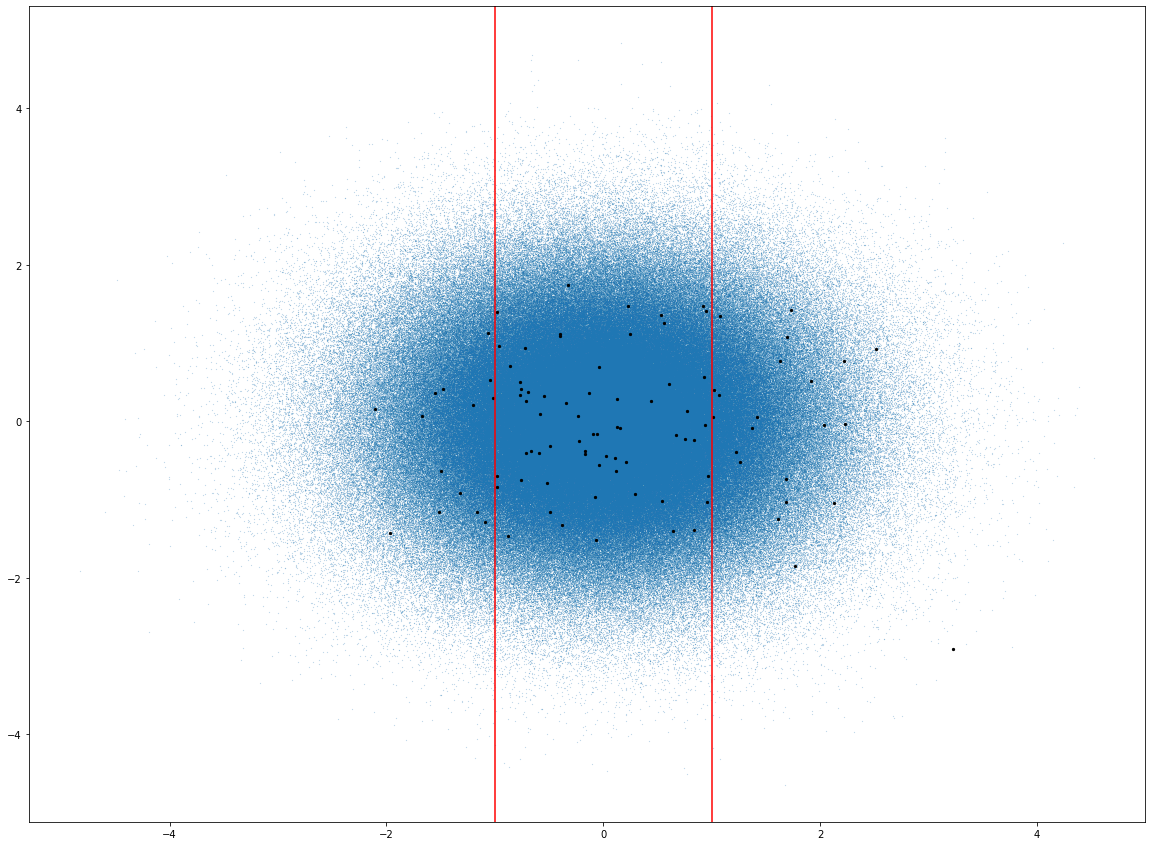

In [325]:
plt.figure(figsize=(20,15))
plt.scatter(points[:,0], points[:,1], s=.01)
plt.scatter(highlight10[:, 0], highlight10[:,1], color='black', s=5)
plt.axvline(x=-1, color='red')
plt.axvline(x=1, color='red')
plt.show()

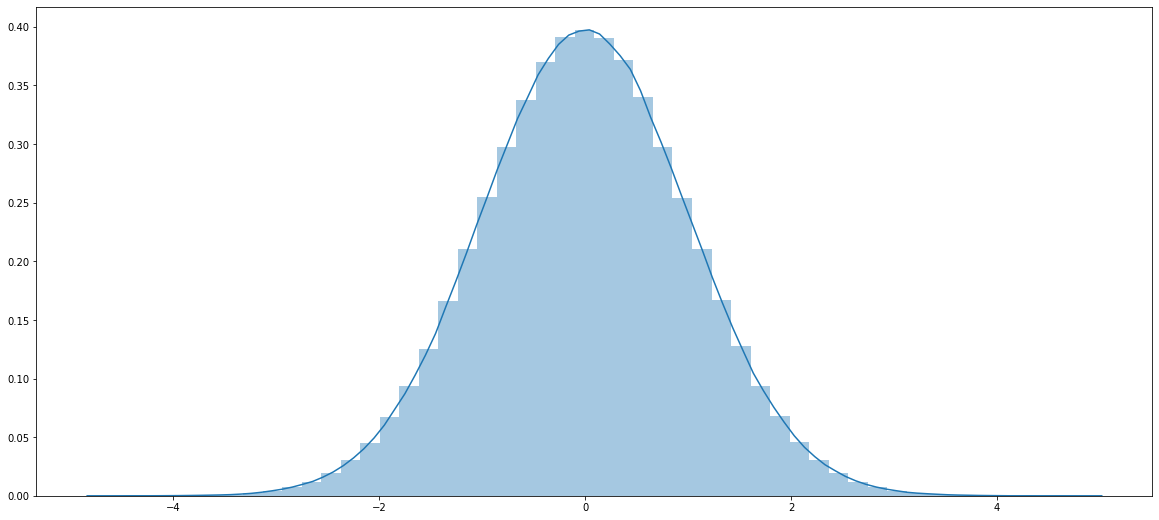

In [241]:
plt.figure(figsize=(20,9))
sns.distplot(points[:,1])
plt.show()

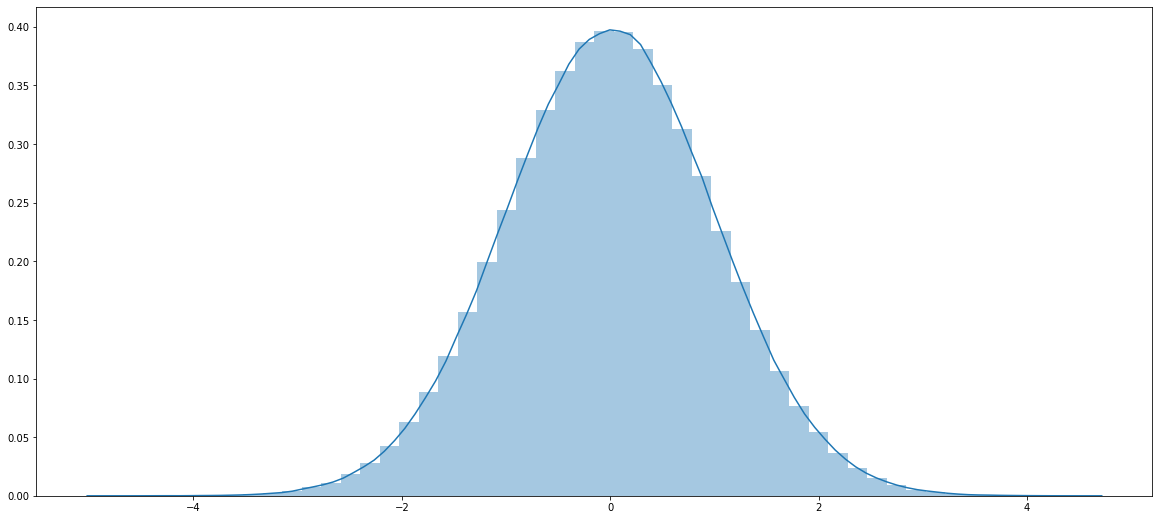

In [244]:
plt.figure(figsize=(20,9))
sns.distplot(points[:,0])
plt.show()

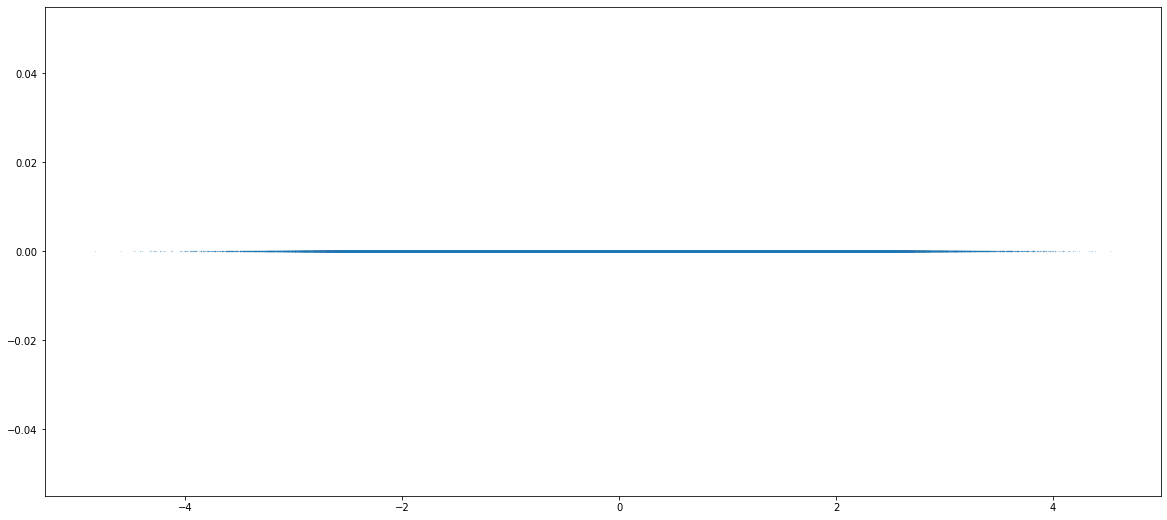

In [245]:
plt.figure(figsize=(20,9))
plt.scatter(points[:,0], np.zeros(1000000), s=.01)
plt.show()